In [1]:
import numpy as np

finalData = np.load('./datasets/BD_HC.npy')
label = np.load('./datasets/BD_HC_label.npy')
sig = np.load('./datasets/BD_HC_sig.npy')

print(finalData.shape)    # (样本数, 脑区数, 脑区数)
print(label.shape)   # (样本数,)    或 (样本数, 1)
print(sig.shape)     # (样本数，时间节点，脑区数)


(392, 116, 116)
(392,)
(392, 950, 116)


In [ ]:
import numpy as np
import torch

def corrcoef(data, replace_nan_as=0):
    """
    计算皮尔逊相关系数矩阵
    输入:
        data: (样本数, 时间节点, 脑区数)
    输出:
        corr: (样本数, 脑区数, 脑区数)
    """
    # 转换为torch张量
    data = torch.from_numpy(data).float()
    
    # 去均值
    x = data - torch.mean(data, dim=1, keepdim=True)
    
    # 计算协方差矩阵
    cov = x.matmul(x.transpose(-2, -1)) / (x.shape[1] - 1)
    
    # 计算标准差
    d = cov[:, range(cov.shape[1]), range(cov.shape[1])]
    stddev = torch.sqrt(d)
    
    # 标准化得到相关系数矩阵
    cov /= stddev[:, :, None]
    cov /= stddev[:, None, :]
    
    # 处理NaN值
    cov = torch.where(torch.isnan(cov), torch.full_like(cov, replace_nan_as), cov)
    
    return cov.numpy()

# 加载sig数据
sig = np.load('./datasets/BD_HC_sig.npy')  # 形状: (392, 950, 116)
sig = torch.from_numpy(sig).permute([0, 2, 1]).numpy()
print("原始sig形状:", sig.shape)

# 处理NaN和Inf值
where_are_nan = np.isnan(sig)
where_are_inf = np.isinf(sig)
sig[where_are_nan] = 0  # 将NaN替换为0
sig[where_are_inf] = 1  # 将Inf替换为1

# 计算相关系数矩阵
data = corrcoef(sig, replace_nan_as=0)  # 形状: (392, 116, 116)
print("生成data形状:", data.shape)

# 保存为BD_HC.npy
np.save('./datasets/new/compute_BD_HC.npy', data)
print("已保存至./datasets/new/compute_BD_HC.npy")

原始sig形状: (392, 116, 950)
生成data形状: (392, 116, 116)
已保存至./datasets/compute_BD_HC.npy


你生成的文件形状: (392, 116, 116)
导师提供的文件形状: (392, 116, 116)
形状一致！
最大绝对差值: 1.309418852445139
平均绝对差值: 0.03941974619278567
数值存在差异！

统计特性比较:
你生成的文件:
  均值: 0.012191
  标准差: 0.307044
  最小值: -0.913100
  最大值: 1.000000
导师提供的文件:
  均值: 0.024442
  标准差: 0.307776
  最小值: -0.923951
  最大值: 1.804182


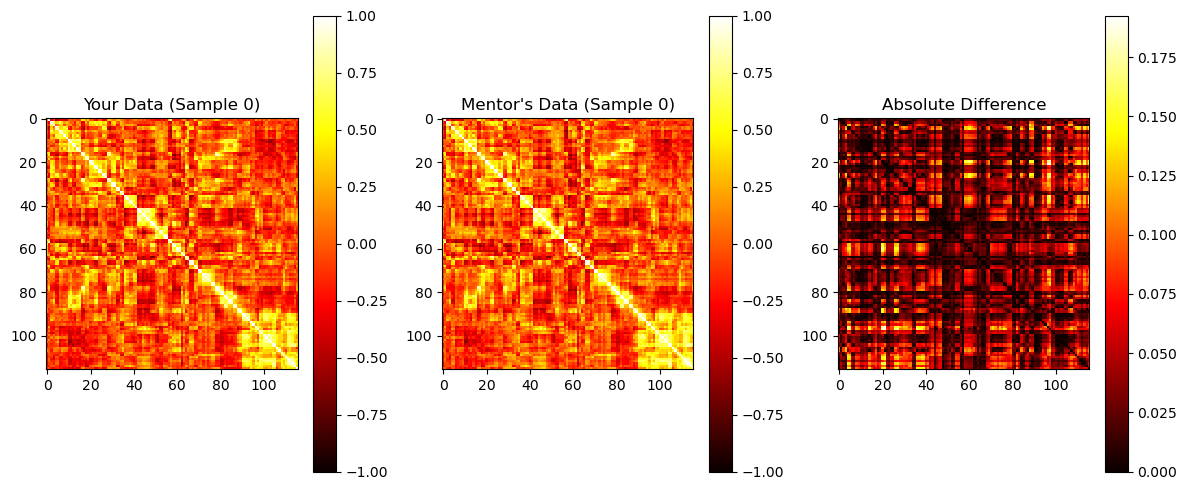

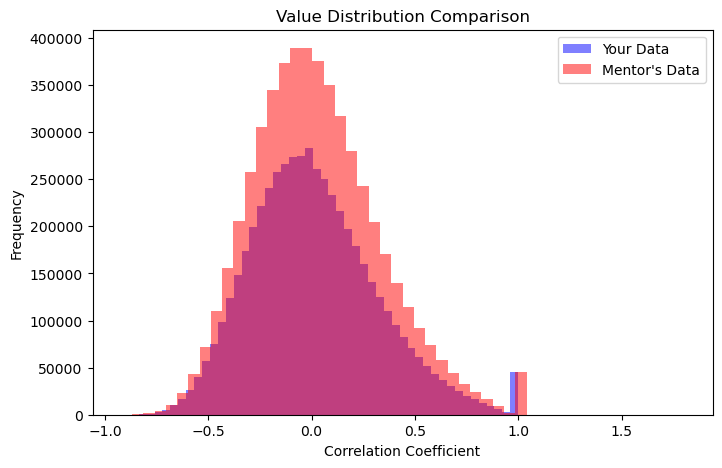

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 加载两个文件
your_data = np.load('./datasets/new/compute_BD_HC.npy')  # 你生成的文件
mentor_data = np.load('./datasets/new/BD_HC.npy')        # 导师提供的文件

# 步骤1：检查形状
print("你生成的文件形状:", your_data.shape)
print("导师提供的文件形状:", mentor_data.shape)
if your_data.shape == mentor_data.shape:
    print("形状一致！")
else:
    print("错误：形状不一致！")

# 步骤2：检查数值差异
diff = np.abs(your_data - mentor_data)
max_diff = np.max(diff)
mean_diff = np.mean(diff)
print(f"最大绝对差值: {max_diff}")
print(f"平均绝对差值: {mean_diff}")

# 检查是否完全相等
if np.allclose(your_data, mentor_data, atol=1e-6):
    print("两个文件的数值完全一致（在1e-6的误差范围内）！")
else:
    print("数值存在差异！")

# 步骤3：检查统计特性
print("\n统计特性比较:")
print("你生成的文件:")
print(f"  均值: {np.mean(your_data):.6f}")
print(f"  标准差: {np.std(your_data):.6f}")
print(f"  最小值: {np.min(your_data):.6f}")
print(f"  最大值: {np.max(your_data):.6f}")
print("导师提供的文件:")
print(f"  均值: {np.mean(mentor_data):.6f}")
print(f"  标准差: {np.std(mentor_data):.6f}")
print(f"  最小值: {np.min(mentor_data):.6f}")
print(f"  最大值: {np.max(mentor_data):.6f}")

# 步骤4：可视化部分矩阵
sample_idx = 0  # 检查第一个样本的矩阵
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(your_data[sample_idx], cmap='hot', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.title("Your Data (Sample 0)")

plt.subplot(1, 3, 2)
plt.imshow(mentor_data[sample_idx], cmap='hot', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.title("Mentor's Data (Sample 0)")

plt.subplot(1, 3, 3)
plt.imshow(np.abs(your_data[sample_idx] - mentor_data[sample_idx]), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Absolute Difference")

plt.tight_layout()
plt.show()

# 步骤5：比较值分布
plt.figure(figsize=(8, 5))
plt.hist(your_data.flatten(), bins=50, alpha=0.5, label='Your Data', color='blue')
plt.hist(mentor_data.flatten(), bins=50, alpha=0.5, label='Mentor\'s Data', color='red')
plt.legend()
plt.title("Value Distribution Comparison")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()

In [6]:
print("A 值范围:", np.min(mentor_data), np.max(mentor_data))
print("A 非零比例:", np.mean(mentor_data != 0))

A 值范围: -0.9239513014041859 1.804182151746279
A 非零比例: 1.0


In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118  # Adjust for your CUDA version
!pip install numpy scikit-learn matplotlib

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [4]:
import torch
print("PyTorch 版本:", torch.__version__)
print("CUDA 可用:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA 版本:", torch.version.cuda)
    print("GPU 设备:", torch.cuda.get_device_name(0))

PyTorch 版本: 1.12.0+cpu
CUDA 可用: False
